Data source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

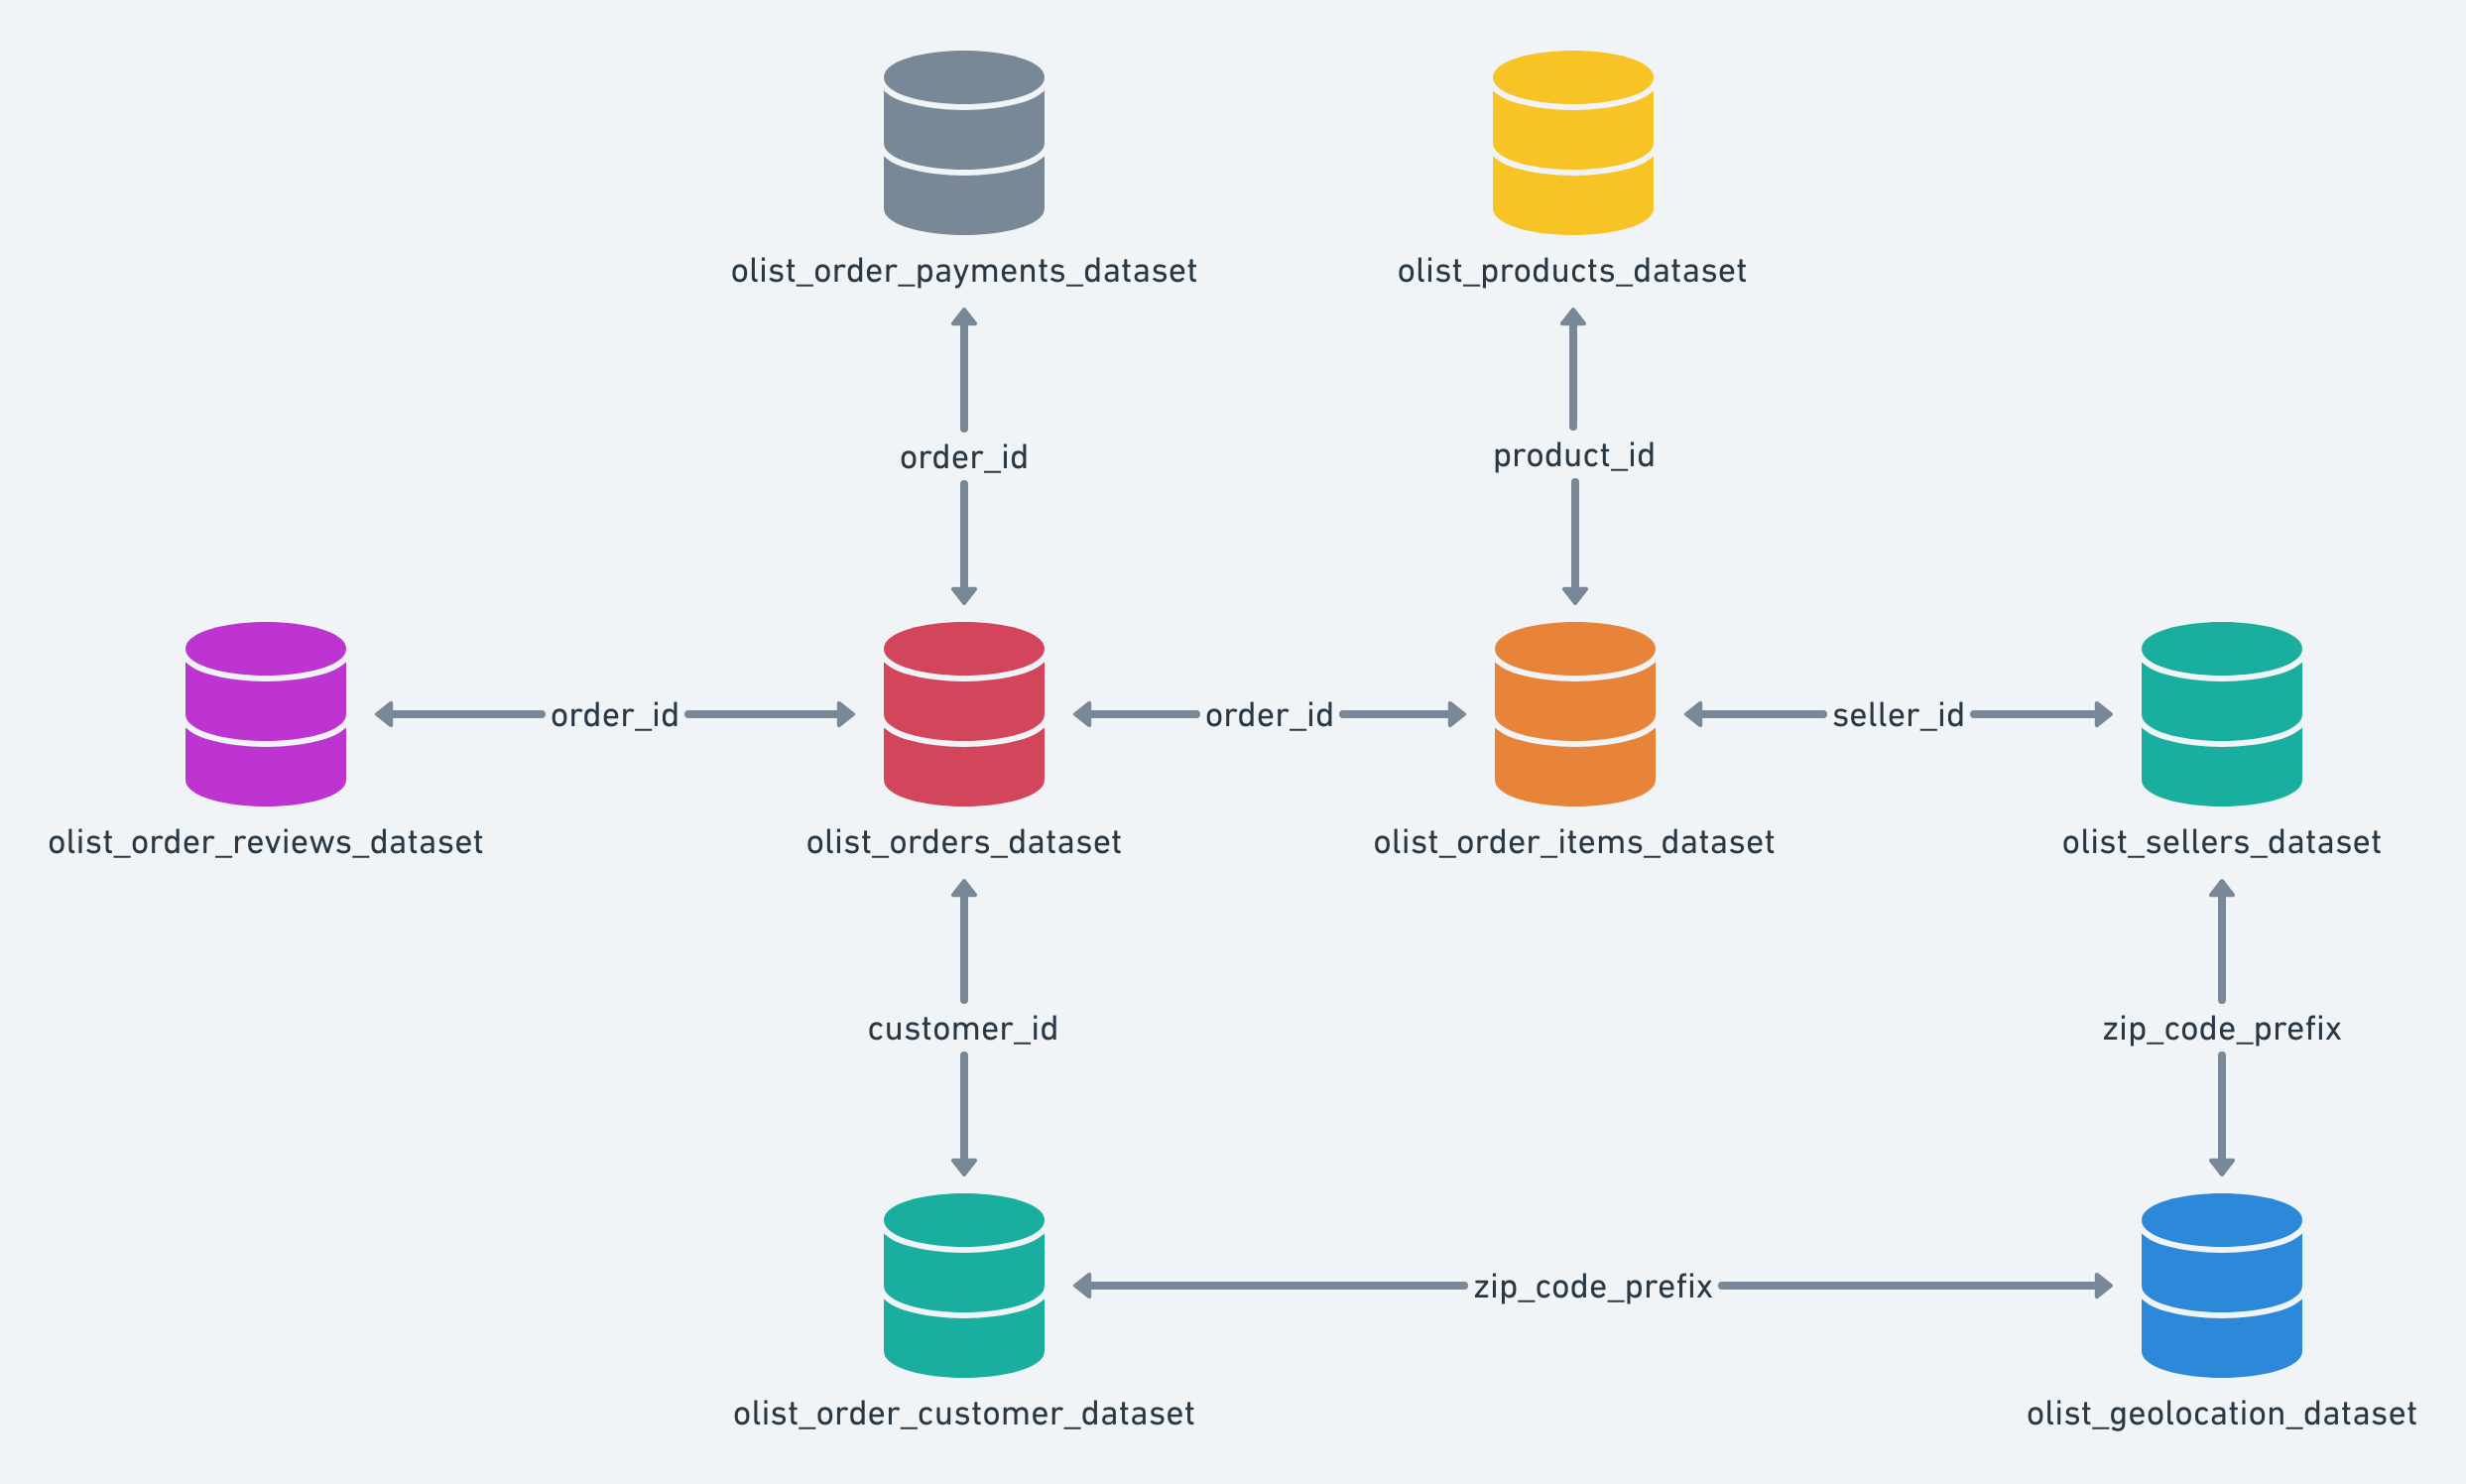

In [72]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
import plotly.express as px
import plotly.io as pio

## Orders

In [3]:
df_orders = pd.read_csv("olist_orders_dataset.csv")

In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
df_orders["order_approved_at"] = pd.to_datetime(df_orders["order_approved_at"])
df_orders["order_delivered_carrier_date"] = pd.to_datetime(df_orders["order_delivered_carrier_date"])
df_orders["order_delivered_customer_date"] = pd.to_datetime(df_orders["order_delivered_customer_date"])
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"])

In [7]:
df_orders.groupby(["order_status"])["order_id"].count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

In [8]:
byDate = df_orders.groupby([df_orders['order_purchase_timestamp'].dt.date])["order_id"].count()
byDate = byDate.reset_index()
byDate

,order_purchase_timestamp,order_id
0,2016-09-04,1
1,2016-09-05,1
2,2016-09-13,1
3,2016-09-15,1
4,2016-10-02,1
...,...,...
629,2018-09-29,1
630,2018-10-01,1
631,2018-10-03,1
632,2018-10-16,1


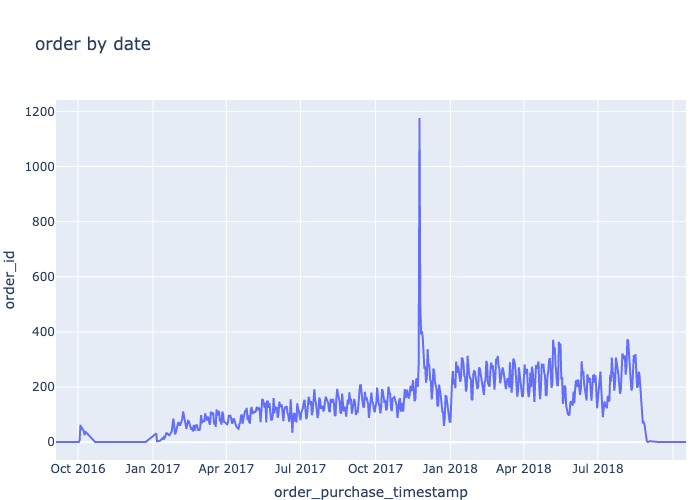

In [9]:
fig = px.line(byDate, x='order_purchase_timestamp', y='order_id', title='order by date')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
#fig.write_html("visuals/byDate-bar.html")

Cleaning: exclude the orders before Jan 2017 and after Aug 2018:

In [10]:
df_orders_01 = df_orders[(df_orders["order_purchase_timestamp"] >= pd.Timestamp(2017,1,1)) 
                      & (df_orders["order_purchase_timestamp"] <= pd.Timestamp(2018,8,31))]
df_orders_01

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [11]:
byMonth = df_orders_01.groupby([df_orders['order_purchase_timestamp'].dt.to_period('M')])["order_id"].count().reset_index()
byMonth

,order_purchase_timestamp,order_id
0,2017-01,800
1,2017-02,1780
2,2017-03,2682
3,2017-04,2404
4,2017-05,3700
5,2017-06,3245
6,2017-07,4026
7,2017-08,4331
8,2017-09,4285
9,2017-10,4631


In [12]:
df_orders_01["weekday"] = df_orders_01['order_purchase_timestamp'].dt.weekday
df_orders_01["hour"] = df_orders_01['order_purchase_timestamp'].dt.hour

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_57984/312471368.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_57984/312471368.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
df_orders_01["weekday"] = df_orders_01["weekday"].astype("string")
df_orders_01 = df_orders_01.replace({'weekday': {"0": "Mon", "1": "Tue", "2": "Wed", "3": "Thu", 
                            "4": "Fri", "5": "Sat", "6": "Sun"}})

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_57984/3815919838.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
byWeekday = df_orders_01.groupby([df_orders_01['order_purchase_timestamp'].dt.weekday])["order_id"].count().reset_index()
byHour = df_orders_01.groupby([df_orders_01['order_purchase_timestamp'].dt.hour])["order_id"].count().reset_index()

In [15]:
byWkdHr = df_orders_01.groupby(["weekday", "hour"]).count()["order_id"].unstack()
byWkdHr

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Fri,425,216,71,49,40,36,97,206,490,766,...,956,977,971,814,722,781,738,723,698,510
Mon,326,134,65,36,19,22,69,158,478,777,...,1093,1072,1089,988,924,945,1027,1116,987,717
Sat,315,174,66,43,24,24,53,105,246,431,...,675,718,696,699,708,756,726,650,546,428
Sun,266,141,69,44,27,27,34,105,205,349,...,684,714,712,797,895,899,967,888,863,603
Thu,353,167,74,39,31,28,85,218,500,754,...,974,926,1073,906,780,824,835,840,854,549
Tue,306,158,80,28,29,24,71,223,522,861,...,1119,1039,1074,965,874,919,985,1023,961,687
Wed,396,178,81,33,33,27,93,210,512,827,...,1046,980,1039,961,850,847,900,961,873,614


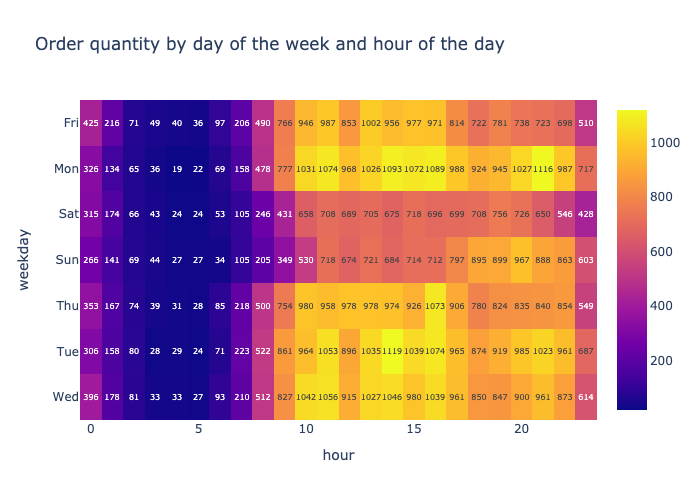

In [16]:
fig = px.imshow(byWkdHr, text_auto=True, 
               title="Order quantity by day of the week and hour of the day")
#fig.show()
fig.show(renderer="png")

## Payment

In [19]:
df_payments = pd.read_csv("olist_order_payments_dataset.csv")

- payment_sequential: a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.
- payment_type: method of payment chosen by the customer.
- payment_installments: number of installments chosen by the customer.
- payment_value: transaction value.

In [20]:
df_payments["order_id"].nunique()

99440

In [21]:
df_payments_total = df_payments.groupby('order_id')['payment_value'].sum().reset_index()
df_payments_total

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [23]:
df_all = df_orders_01.merge(df_payments_total, how = "left", on = "order_id")
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,hour,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Mon,10,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tue,20,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wed,8,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Sat,19,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tue,21,28.62
...,...,...,...,...,...,...,...,...,...,...,...
99086,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,Thu,9,85.08
99087,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Tue,12,195.00
99088,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Sun,14,271.01
99089,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Mon,21,441.16


In [24]:
byMonth_revenue = df_all.groupby([df_all['order_purchase_timestamp'].dt.to_period('M')])["payment_value"].sum().reset_index()
byMonth_revenue

,order_purchase_timestamp,payment_value
0,2017-01,138488.04
1,2017-02,291908.01
2,2017-03,449863.60
3,2017-04,417788.03
4,2017-05,592918.82
5,2017-06,511276.38
6,2017-07,592382.92
7,2017-08,674396.32
8,2017-09,727762.45
9,2017-10,779677.88


In [25]:
byMonth_revenue['order_purchase_timestamp'] = byMonth_revenue['order_purchase_timestamp'].astype('string')

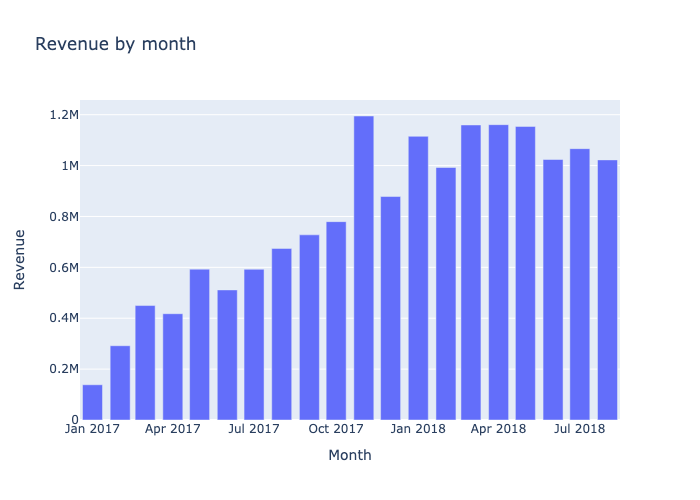

In [26]:
fig = px.bar(byMonth_revenue, x='order_purchase_timestamp', y='payment_value', 
             labels={'order_purchase_timestamp':'Month', 'payment_value':'Revenue'}, 
             title='Revenue by month')

#fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

In [27]:
byMonth_revenue['MonthlyGrowth'] = byMonth_revenue['payment_value'].pct_change()
byMonth_revenue

,order_purchase_timestamp,payment_value,MonthlyGrowth
0,2017-01,138488.04,NaN
1,2017-02,291908.01,1.107821
2,2017-03,449863.60,0.541114
3,2017-04,417788.03,-0.071301
4,2017-05,592918.82,0.419186
5,2017-06,511276.38,-0.137696
6,2017-07,592382.92,0.158635
7,2017-08,674396.32,0.138447
8,2017-09,727762.45,0.079132
9,2017-10,779677.88,0.071336


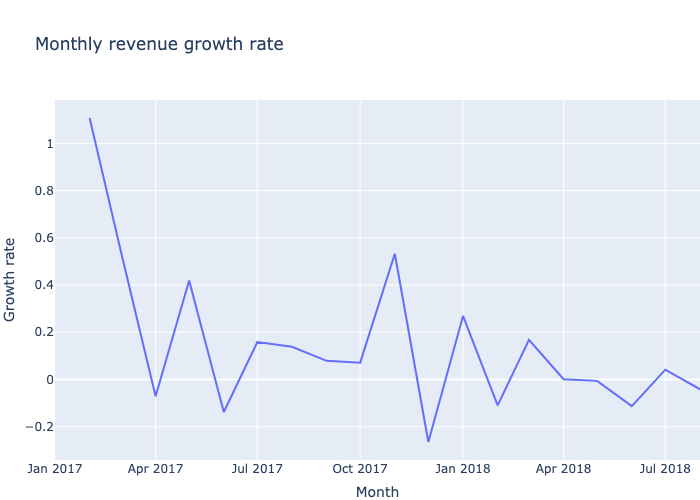

In [29]:
fig = px.line(byMonth_revenue, x='order_purchase_timestamp', y='MonthlyGrowth',
              labels={'order_purchase_timestamp':'Month', 'MonthlyGrowth':'Growth rate'}, 
              title='Monthly revenue growth rate')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
#fig.write_html("visuals/byDate-bar.html")

## Customer

- customer_id: key to the orders dataset. Each order has a unique customer_id.
- customer_unique_id: unique identifier of a customer.
- customer_zip_code_prefix: first five digits of customer zip code.
- customer_city: customer city name
- customer_state: customer state

In [30]:
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Find each customer's first order

In [31]:
df_all = df_all.merge(df_customers, how = 'left', on = 'customer_id')
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,hour,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Mon,10,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tue,20,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wed,8,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Sat,19,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tue,21,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99086,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,Thu,9,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99087,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Tue,12,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99088,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Sun,14,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99089,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Mon,21,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [32]:
df_first_order = df_all.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
df_first_order.columns = ['customer_unique_id','first_order_date']
df_first_order

,customer_unique_id,first_order_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
95768,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
95769,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
95770,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
95771,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [33]:
newCus = df_first_order.groupby([df_first_order['first_order_date'].dt.to_period('M')])["customer_unique_id"].count().reset_index()
newCus.columns = ['first_order_month','new_customer_count']

In [34]:
newCus['first_order_month'] = newCus['first_order_month'].astype('string')

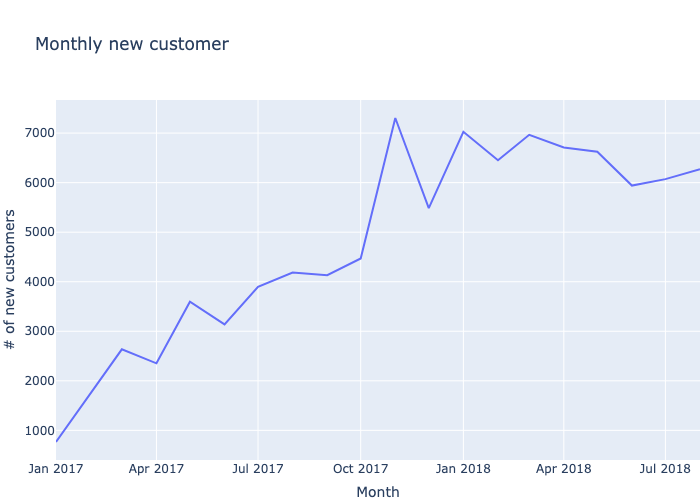

In [35]:
fig = px.line(newCus, x='first_order_month', y='new_customer_count',
              labels={'first_order_month':'Month', 'new_customer_count':'# of new customers'}, 
              title='Monthly new customer')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

In [36]:
df_all = df_all.merge(df_first_order, how = 'left', on = "customer_unique_id")

In [38]:
df_all['usertype'] = 'New'
df_all.loc[df_all['order_purchase_timestamp'] > df_all['first_order_date'],'usertype'] = 'Return'
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,hour,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,first_order_date,usertype
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Mon,10,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-04 11:26:38,Return
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tue,20,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-24 20:41:37,New
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wed,8,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-08 08:38:49,New
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Sat,19,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-18 19:28:06,New
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tue,21,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-13 21:18:39,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99086,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,Thu,9,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03-09 09:54:05,New
99087,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Tue,12,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02-06 12:58:58,New
99088,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Sun,14,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08-27 14:46:43,New
99089,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Mon,21,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01-08 21:28:27,New


In [39]:
df_order_customer = df_all.groupby([df_all['order_purchase_timestamp'].dt.to_period('M'), 
                                       'usertype'])['order_id'].count().reset_index()
df_order_customer['order_purchase_timestamp'] = df_order_customer['order_purchase_timestamp'].astype("string")
df_order_customer

,order_purchase_timestamp,usertype,order_id
0,2017-01,New,772
1,2017-01,Return,28
2,2017-02,New,1755
3,2017-02,Return,25
4,2017-03,New,2642
5,2017-03,Return,40
6,2017-04,New,2359
7,2017-04,Return,45
8,2017-05,New,3613
9,2017-05,Return,87


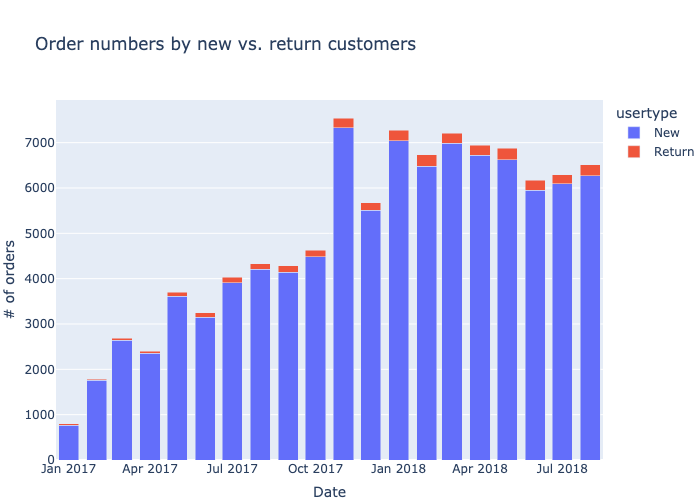

In [40]:
fig = px.bar(df_order_customer, x='order_purchase_timestamp', y='order_id',
              color="usertype", barmode = 'stack',
              labels={'order_purchase_timestamp':'Date', 'order_id':'# of orders'}, 
              title='Order numbers by new vs. return customers')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
#fig.write_html("visuals/byDate-bar.html")

In [41]:
df_revenue_customer = df_all.groupby([df_all['order_purchase_timestamp'].dt.to_period('M'), 
                                         'usertype'])['payment_value'].sum().reset_index()

df_revenue_customer['order_purchase_timestamp'] = df_revenue_customer['order_purchase_timestamp'].astype('string')
df_revenue_customer

,order_purchase_timestamp,usertype,payment_value
0,2017-01,New,136090.70
1,2017-01,Return,2397.34
2,2017-02,New,288727.15
3,2017-02,Return,3180.86
4,2017-03,New,445317.33
5,2017-03,Return,4546.27
6,2017-04,New,410308.73
7,2017-04,Return,7479.30
8,2017-05,New,578326.48
9,2017-05,Return,14592.34


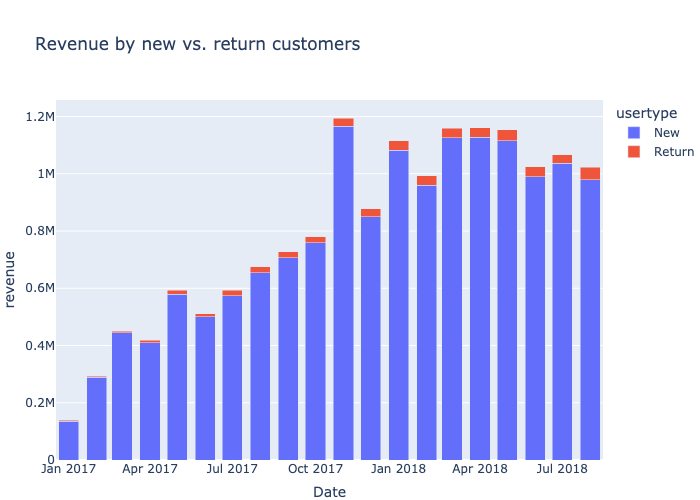

In [42]:
fig = px.bar(df_revenue_customer, x='order_purchase_timestamp', y='payment_value',
              color="usertype", barmode = 'stack',
              labels={'order_purchase_timestamp':'Date', 'payment_value':'revenue'}, 
              title='Revenue by new vs. return customers')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

Export data for Segmentation analysis:

In [314]:
df_all.to_csv("combined_data.csv")

## Order Items
- order_id: order unique identifier
- order_item_id: sequential number identifying number of items included in the same order
- product_id: product unique identifier
- seller_id: seller unique identifier
- shipping_limit_date: the seller shipping limit date for handling the order over to the logistic partner.
- price: item price
- freight_value: item freight value item (if an order has more than one item the freight value is splitted between items)

In [17]:
df_order_items = pd.read_csv("olist_order_items_dataset.csv")
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Number of items per order:

In [50]:
no_items = df_order_items.groupby("order_id")["product_id"].count().reset_index()
no_items.rename(columns={'product_id':'no_of_items'}, inplace=True)
no_items.describe()

,no_of_items
count,98666.000000
mean,1.141731
std,0.538452
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,21.000000


array([[<AxesSubplot:title={'center':'no_of_items'}>]], dtype=object)

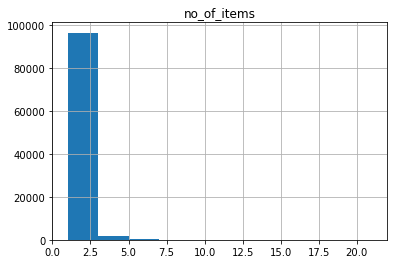

In [47]:
no_items.hist()

Price and freight value for each order

In [46]:
total = df_order_items.groupby("order_id").agg({"price":"sum", "freight_value":"sum"}).reset_index()
total

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


In [62]:
df_all = df_all.merge(no_items, how = "left", on = "order_id")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,hour,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,first_order_date,usertype,no_of_items
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Mon,10,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-04 11:26:38,Return,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tue,20,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-24 20:41:37,New,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wed,8,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-08 08:38:49,New,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Sat,19,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-18 19:28:06,New,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tue,21,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-13 21:18:39,New,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99086,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,Thu,9,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03-09 09:54:05,New,1.0
99087,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Tue,12,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02-06 12:58:58,New,1.0
99088,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Sun,14,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08-27 14:46:43,New,1.0
99089,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Mon,21,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01-08 21:28:27,New,2.0


In [63]:
df_all = df_all.merge(total, how = "left", on = "order_id")

## Geo location

In [74]:
df_geo = pd.read_csv("olist_geolocation_dataset.csv")
df_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [79]:
df_geo["geolocation_zip_code_prefix"].nunique()

19015

It seems that the df_geo data lacks PK to match with customer and seller data

### Number of customers in each state

In [84]:
df_geo_cus = df_all.groupby(["customer_city"])["customer_unique_id"].count().reset_index()
df_geo_cus.rename(columns={'customer_unique_id':'customer_number'}, inplace=True)

In [89]:
df_geo_cus.sort_values(by = "customer_number", ascending = False).head(10)

,customer_city,customer_number
3594,sao paulo,15501
3152,rio de janeiro,6843
451,belo horizonte,2758
556,brasilia,2125
1140,curitiba,1515
704,campinas,1437
2961,porto alegre,1372
3244,salvador,1245
1526,guarulhos,1187
3425,sao bernardo do campo,935


Sales per seller

In [51]:
order_per_seller = df_order_items.groupby('seller_id')['order_id'].nunique().reset_index()
order_per_seller.rename(columns={'order_id':'no_of_orders'}, inplace=True)
order_per_seller.describe()

,no_of_orders
count,3095.000000
mean,32.313409
std,105.139763
min,1.000000
25%,2.000000
50%,6.000000
75%,21.500000
max,1854.000000


In [52]:
item_per_seller = df_order_items.groupby('seller_id')['order_id'].count().reset_index()
item_per_seller.rename(columns={'order_id':'no_of_items'}, inplace=True)
item_per_seller.describe()

,no_of_items
count,3095.000000
mean,36.397415
std,119.193461
min,1.000000
25%,2.000000
50%,8.000000
75%,24.000000
max,2033.000000


In [58]:
sales_per_seller = df_order_items.groupby('seller_id')['price'].sum().reset_index()
sales_per_seller.rename(columns={'price':'sales'}, inplace=True)
sales_per_seller.describe()

,sales
count,3095.000000
mean,4391.484233
std,13921.997192
min,3.500000
25%,208.850000
50%,821.480000
75%,3280.830000
max,229472.630000


Best sellers

In [59]:
no_products = df_order_items.groupby('product_id')['order_id'].count().reset_index()
no_products.rename(columns={'order_id':'number'}, inplace=True)
no_products.describe()

,number
count,32951.000000
mean,3.418713
std,10.619709
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,527.000000


## Product

- product_category_name: root category of product, in Portuguese
- product_name_lenght: number of characters extracted from the product name
- product_description_lenght: number of characters extracted from the product description